In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from subprocess import check_output

In [2]:
df=pd.read_csv('crowddata.csv')

In [3]:
df.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


In [4]:
df.tail()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
62179,23,2017-03-18 18:42:28-07:00,67348,5,1,0,61.07,0,1,3,18
62180,21,2017-03-18 18:52:35-07:00,67955,5,1,0,61.07,0,1,3,18
62181,25,2017-03-18 19:02:40-07:00,68560,5,1,0,56.71,0,1,3,19
62182,18,2017-03-18 19:12:47-07:00,69167,5,1,0,56.71,0,1,3,19
62183,23,2017-03-18 19:22:51-07:00,69771,5,1,0,56.71,0,1,3,19


In [5]:
df.shape

(62184, 11)

In [6]:
print(*df.columns,sep='\n')

number_people
date
timestamp
day_of_week
is_weekend
is_holiday
temperature
is_start_of_semester
is_during_semester
month
hour


In [7]:
df.dtypes

number_people             int64
date                     object
timestamp                 int64
day_of_week               int64
is_weekend                int64
is_holiday                int64
temperature             float64
is_start_of_semester      int64
is_during_semester        int64
month                     int64
hour                      int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
number_people           62184 non-null int64
date                    62184 non-null object
timestamp               62184 non-null int64
day_of_week             62184 non-null int64
is_weekend              62184 non-null int64
is_holiday              62184 non-null int64
temperature             62184 non-null float64
is_start_of_semester    62184 non-null int64
is_during_semester      62184 non-null int64
month                   62184 non-null int64
hour                    62184 non-null int64
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB


In [9]:
df.isnull().sum()

number_people           0
date                    0
timestamp               0
day_of_week             0
is_weekend              0
is_holiday              0
temperature             0
is_start_of_semester    0
is_during_semester      0
month                   0
hour                    0
dtype: int64

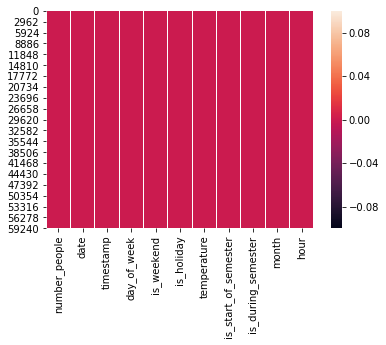

In [10]:
sns.heatmap(df.isnull())

In [11]:
df.duplicated().sum()

0

In [12]:
df.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000


In [13]:
# Exploratory Data Analysis

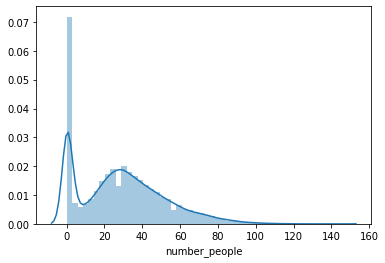

In [14]:
sns.distplot(df.number_people)

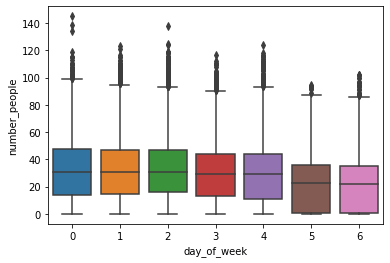

In [15]:
sns.boxplot(df.day_of_week,df.number_people)

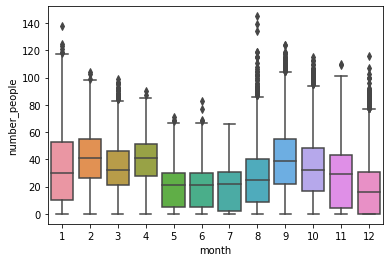

In [16]:
sns.boxplot(df.month,df.number_people)

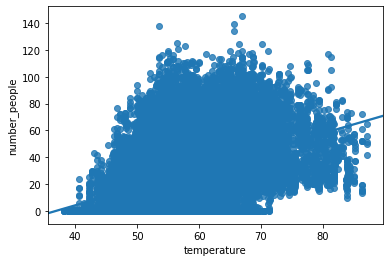

In [17]:
sns.regplot(df.temperature,df.number_people)

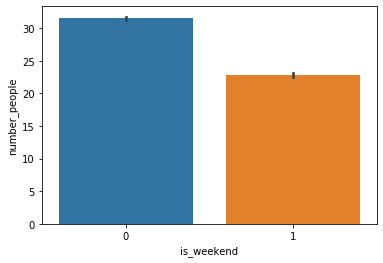

In [18]:
sns.barplot(df.is_weekend,df.number_people)

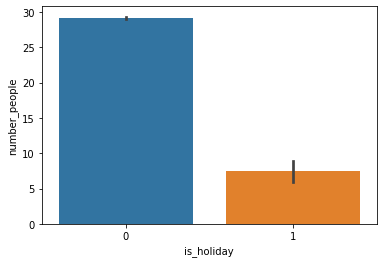

In [19]:
sns.barplot(df.is_holiday,df.number_people)

In [20]:
df.corr()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
number_people,1.000000,0.550218,-0.162062,-0.173958,-0.048249,0.373327,0.182683,0.335350,-0.097854,0.552049
timestamp,0.550218,1.000000,-0.001793,-0.000509,0.002851,0.184849,0.009551,0.044676,-0.023221,0.999077
day_of_week,-0.162062,-0.001793,1.000000,0.791338,-0.075862,0.011169,-0.011782,-0.004824,0.015559,-0.001914
is_weekend,-0.173958,-0.000509,0.791338,1.000000,-0.031899,0.020673,-0.016646,-0.036127,0.008462,-0.000517
is_holiday,-0.048249,0.002851,-0.075862,-0.031899,1.000000,-0.088527,-0.014858,-0.070798,-0.094942,0.002843
temperature,0.373327,0.184849,0.011169,0.020673,-0.088527,1.000000,0.093242,0.152476,0.063125,0.185121
is_start_of_semester,0.182683,0.009551,-0.011782,-0.016646,-0.014858,0.093242,1.000000,0.209862,-0.137160,0.010091
is_during_semester,0.335350,0.044676,-0.004824,-0.036127,-0.070798,0.152476,0.209862,1.000000,0.096556,0.045581
month,-0.097854,-0.023221,0.015559,0.008462,-0.094942,0.063125,-0.137160,0.096556,1.000000,-0.023624
hour,0.552049,0.999077,-0.001914,-0.000517,0.002843,0.185121,0.010091,0.045581,-0.023624,1.000000


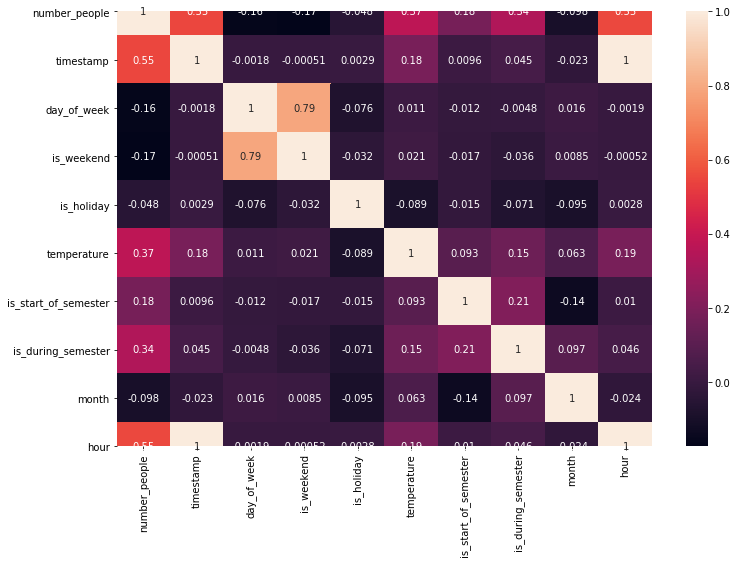

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

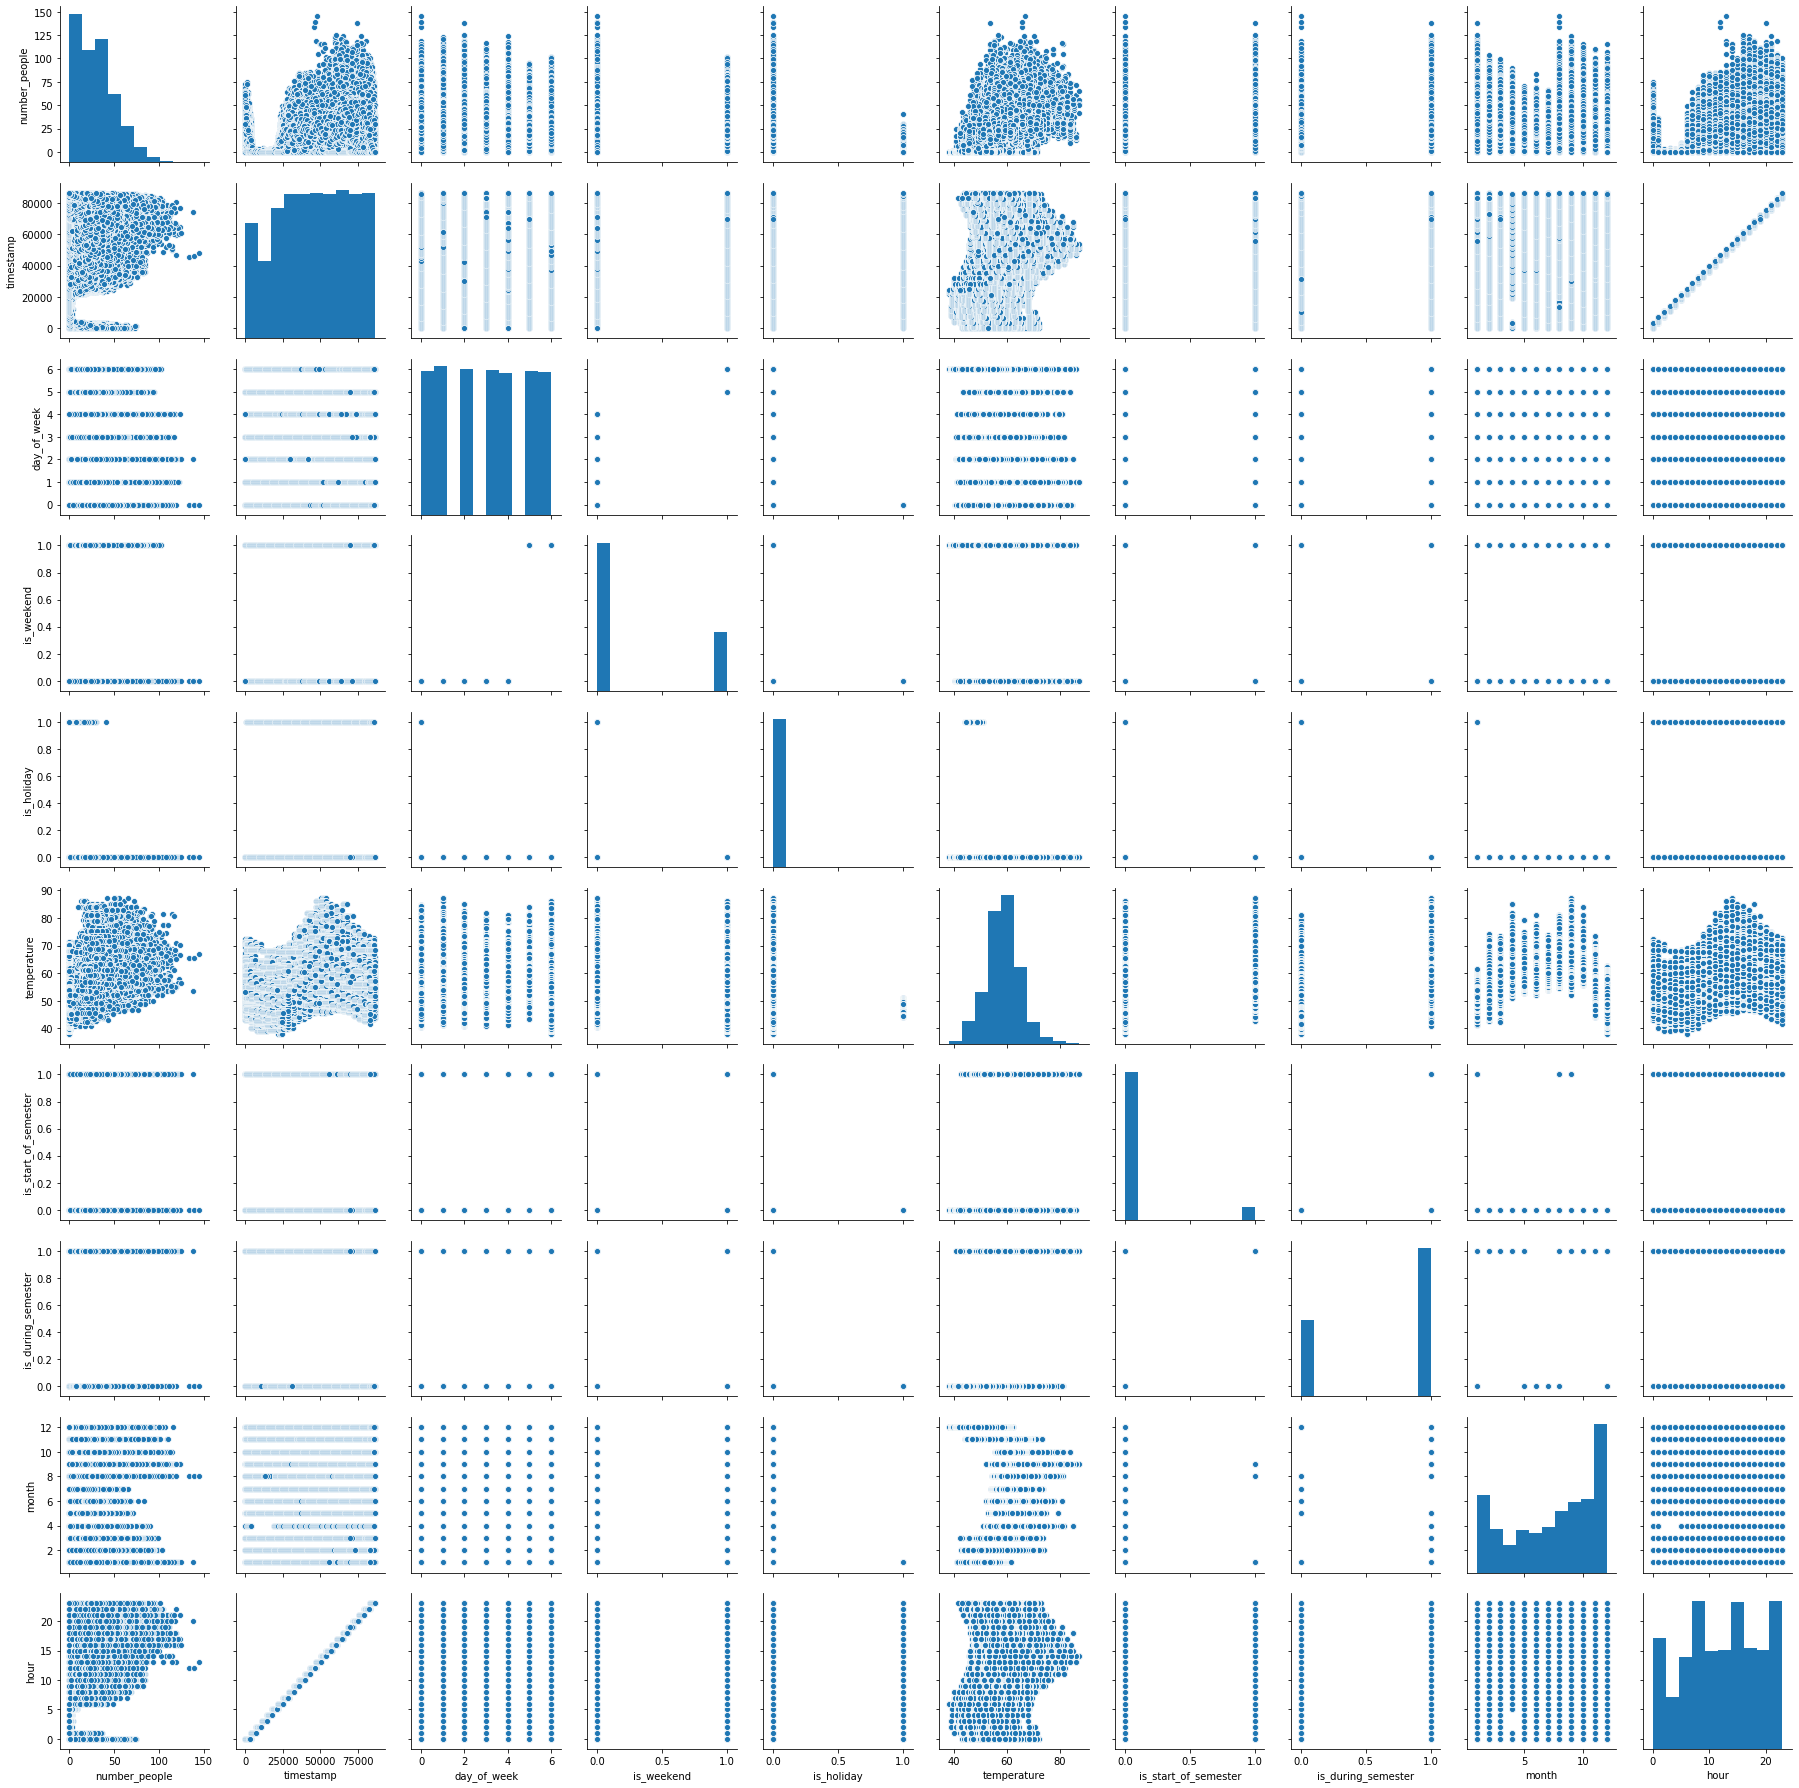

In [22]:
sns.pairplot(df)

In [23]:
### Model Building

In [24]:
df=df.drop('date',axis=1)

In [25]:
df.sample(5)

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
33251,0,5102,3,0,0,56.01,0,0,6,1
38356,29,57722,3,0,0,57.00,0,0,8,16
16816,44,30613,2,0,0,47.43,0,1,2,8
33641,24,68012,5,1,0,57.33,0,0,7,18
17209,3,26410,6,1,0,52.19,0,1,2,7


In [26]:
y=df['number_people']
x=df.drop('number_people',axis=1)

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=15)

In [28]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [29]:
sgdreg=SGDRegressor()
sgdreg.fit(x_train,y_train)
pred=sgdreg.predict(x_test)

In [30]:
print('intercept:',sgdreg.intercept_)
print('Coefficients:  ',sgdreg.coef_)

intercept: [29.12964338]
Coefficients:   [-1.43974942 -1.9606446  -2.28749457 -0.68192286  5.31096242  2.31090102
  6.1693897  -2.92107962 13.03361844]


In [31]:
print('R^2: ',r2_score(y_test,pred))
print('rmse :',np.sqrt(mean_squared_error(y_test,pred)))

R^2:  0.5114241051100765
rmse : 15.990994122787663


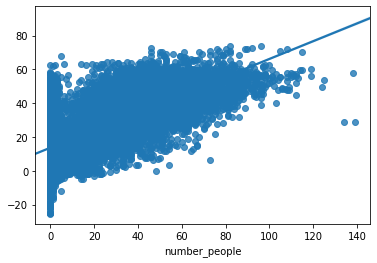

In [32]:
sns.regplot(y_test,pred)

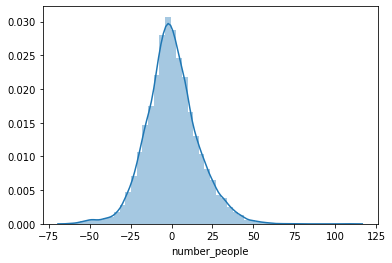

In [33]:
sns.distplot(y_test-pred)